# An Introduction to Plotting and Data Analysis in Python 4
Clyde Fare and João Pedro Malhado, Imperial College London (contact: [python@imperial.ac.uk](python@imperial.ac.uk))

This notebook includes material adapted from Dr. Johansson's scientific Python lectures and is licensed under a [Creative Commons Attribution 4.0 (CC-by) license](http://creativecommons.org/licenses/by/4.0/)

Overview
--------
During this workshop we will recap what we covered in workshop 3 then build on it covering creation of our own mathematical functions, fitting to non linear functions and 3D plotting.

This is an interactive tutorial - as you go through it any time you see something that looks like this:

    a = "Hello"
   
that's followed by an empty *code cell* (a light grey rectangle with a label like *"In[ ]"*), you should 
type the expression in the code cell, hit Shift+Return to *execute* it, and note the output.

Limit copying and pasting to cells requiring more than 5 lines! You'll learn the concepts better if you type them out yourself.

As usual let's import pylab so that we have access to the plotting and statistical functions it contains

    %pylab inline

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Recap from previous workshops

## Reading and writing data files

We learned to load and record arrays using the **loadtxt** and **savetxt** functions

    test_data = loadtxt('ideal_gas_data.txt')
    test_data

In [2]:
test_data=loadtxt('ideal_gas_data.txt')
test_data

array([[    300.        ,  103371.86855875],
       [    305.26315789,  105803.19267969],
       [    310.52631579,  106441.37145736],
       [    315.78947368,  108047.25729811],
       [    321.05263158,  111679.37396446],
       [    326.31578947,  112314.08727412],
       [    331.57894737,  114683.9096138 ],
       [    336.84210526,  117466.99565388],
       [    342.10526316,  119500.53132061],
       [    347.36842105,  120499.20605605],
       [    352.63157895,  119174.26518224],
       [    357.89473684,  120745.55313126],
       [    363.15789474,  125967.47231105],
       [    368.42105263,  140525.18814006],
       [    373.68421053,  123574.91997216],
       [    378.94736842,  132779.73922223],
       [    384.21052632,  127731.98415635],
       [    389.47368421,  130533.68637784],
       [    394.73684211,  126395.82226069],
       [    400.        ,  125029.66534637]])

## Basic statistics

We used basic statistical functions like the mean, standard deviation and standard error as well constructing histograms of our data.

    mean(test_data, axis=0)

In [3]:
mean(test_data,axis=0)

array([    350.        ,  119613.30449885])

## Filtering

We filtered data based on value

    temp = test_data[:,0]
    filtered_data = test_data[temp<=360]
    filtered_data

In [4]:
temp=test_data[:,0]
filtered_data=test_data[temp<=360]
filtered_data

array([[    300.        ,  103371.86855875],
       [    305.26315789,  105803.19267969],
       [    310.52631579,  106441.37145736],
       [    315.78947368,  108047.25729811],
       [    321.05263158,  111679.37396446],
       [    326.31578947,  112314.08727412],
       [    331.57894737,  114683.9096138 ],
       [    336.84210526,  117466.99565388],
       [    342.10526316,  119500.53132061],
       [    347.36842105,  120499.20605605],
       [    352.63157895,  119174.26518224],
       [    357.89473684,  120745.55313126]])

## Linear Fitting

And learned to use polyfit to extract coefficients defining a straight line:

    filtered_temp=filtered_data[:,0]
    filtered_pressure=filtered_data[:,1]
    
    polyfit(filtered_temp, filtered_pressure, 1, cov=True)

In [5]:
filtered_temp=filtered_data[:,0]
filtered_pressure=filtered_data[:,1]
polyfit(filtered_temp,filtered_pressure,1,cov=True)

(array([  323.43453035,  6917.696733  ]),
 array([[  5.71600602e+02,  -1.88026514e+05],
        [ -1.88026514e+05,   6.20395132e+07]]))

And to plot the resulting straight line alongside the original data

    poly_out = polyfit(filtered_temp,filtered_pressure,1,cov=True)
    params=poly_out[0]
    m=params[0]
    c=params[1]
    plot(filtered_temp,filtered_pressure,marker='o', linestyle='')
    plot(filtered_temp, m*filtered_temp + c, linestyle='--')
    show()

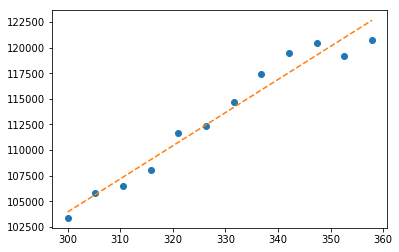

In [6]:
poly_out=polyfit(filtered_temp,filtered_pressure,1,cov=True)
params=poly_out[0]
m=params[0]
c=params[1]
plot(filtered_temp,filtered_pressure,marker='o',linestyle='')
plot(filtered_temp,m*filtered_temp+c,linestyle='--')
show()

# Going further

What we would like to do is to go beyond fitting simple straight lines and fit some more complicated functions. We will be doing that presently, but first will introduce some features of the python language we'll be using.

## Modules

It would be a great pain if every time we wanted some new functionality we had to build it ourselves luckily there is a way to import pre-existing code in the form as modules.

Inside your notebook directory you have a file called <a href="workshop4_functions.py">workshop4_functions.py</a> which contains two functions 'fibonacci' and 'factorial' which we want to use in our current notebook. There are several ways we can import and use them.

We can import the whole module and call your functions from it via a dot and the name of the function we want:

    import workshop4_functions

    workshop4_functions.factorial(10)
   

In [7]:
import workshop4_functions
workshop4_functions.factorial(10)

3628800

You can do the same thing but choosing to refer to your module by a different (usually shorter) name:    
    
    import workshop4_functions as wrk4_f

    wrk4_f.factorial(10)

In [8]:
import workshop4_functions as wrk4_f
wrk4_f.factorial(10)

3628800

We can choose to extract one (or more) of the functions directly, in which case we no longer need to make the module explicit when calling it

    from workshop4_functions import fibonacci

    fibonacci(10)

In [9]:
from workshop4_functions import fibonacci
fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

We can extract all functions contained in the module

    from workshop4_functions import *

    factorial(10)

In [10]:
from workshop4_functions import *
factorial(10)

3628800

The downside of options 3 and particularly 4 is that you might accidentally import a function that has the same name as another variable or function being used. Option 2 is generally considered best practice.

The scientific python distribution has a lot of useful modules [built in](http://docs.continuum.io/anaconda/pkgs.html) these can be imported (regardless of directory) in the same way:

    import numpy as np
    np.tanh(0.5)

In [11]:
import numpy as np
np.tanh(0.5)

0.46211715726000974

Once a function is imported once in a notebook it is accessible from all the cells.

    np.tanh(1.5)

In [12]:
np.tanh(0.5)

0.46211715726000974

*When writing scripts we almost always put the import statements at the beginning of the file that way it's immediately clear what the code we are using depends upon.*

One thing to note is that we've actually been using modules all the way through. The %pylab command is really just a cheat for loading several different libraries:

%pylab really does all of this!:

    import numpy
    import matplotlib
    from matplotlib import pylab, mlab, pyplot
    np = numpy
    plt = pyplot

    from IPython.core.pylabtools import figsize, getfigs

    from pylab import *
    from numpy import *
    
(no need to enter this as it's already loaded)

## Functions

You are familiar with the concept of a mathematical function. A mathematical function is as operation that receives an argument or variable and performs a transformation on it. When we write the mathematical expression

$$f(x)=\frac{x^3}{3} ,$$

we are defining an operation $f$, which given an argument $x$ will return the result $\frac{x^3}{3}$.

In programming the concept of a *function* is largely extended and plays a central role in it. Functions will not only transform numbers into other number upon a mathematical operation, but they can transform a mouse click into a window opening event for example. However the simple idea still remains: an operation that receives an argument and returns some result based on the argument it has received.

We will leave more complicating functions for another time and will go back to our mathematical function $f$, which is a perfectly valid function we can define and use in python. In mathematics functions are given one letter names, we can be a bit more verbose and will call our function *one_third_of_cube*:

    def one_third_of_cube(x):
        "Function returning one third of the cube of the argument."
        return x**3/3

In [13]:
def one_third_of_cube(x):
    "Function returning one third of the cube of the argument"
    return x**3/3

We will see how defining a function works in a moment, but let's make use of it first:

    one_third_of_cube(2)

In [14]:
one_third_of_cube(2)

2.6666666666666665

The advantage of having defined a function is that we can then repeat the operation for any other value of the argument

    one_third_of_cube(3)

In [15]:
one_third_of_cube(3)

9.0

    one_third_of_cube(3/2)

In [16]:
one_third_of_cube(3/2)

1.125

The format for defining our own functions is as follows:

Step 1: write a function *signature*
----

A function *signature* tells you how the function will be called. It starts with the keyword *def*, which tells Python that you are *defining* a function. Then comes a space, the name of your function, an open parenthesis, the comma-separated input arguments for your function, a close parenthesis, and a colon. Here's what a function signature looks like for a function that takes no arguments:

    def my_function():

Here's what a function signature looks like for a function that takes one argument called *x1*:

    def my_function(x1):

And one for a function that takes two arguments:

    def my_function(x1,x2):

An important point to note is that *x1* and *x2* in the line above are not variables we may have defined outside the function. They will be names used solely inside the function, just as the $x$ in $f(x)=x^2$ is just a label that could be called $w$ as in $f(w)=w^2$.

Step 1.5: document string
---

After our signature lines we can add a piece of text enclosed in quotes explaining to the human reader what the function is doing.

    def my_function(x1):
        "Explanation of what the my_function does."
        
Again, this is a matter of best practice. When function get very complicated and many lines long, it is very useful to have a short explanation text.

Step 2: do useful work inside the function
----

Underneath the function signature you do your useful work. **Everything inside the function is indented**, so Python knows that it is a part of the function.

We can use the function's argument labels just like we can use variables defined outside of functions.

    def add(x, y):
        "Adds two numbers."
        result = x + y

Step 3: return something
----

If you want to be able to assign a variable to the output of a function, the function has to return that output using the return keyword.

    def add(x, y):
        "Adds two numbers."
        result = x + y
        return result

or, even shorter:

    def add(x, y):
        "Adds two numbers."
        return x + y

Once you execute a return, you are done with the function -- you don't get to do any more work. That means if you have a function like this:

    def add(x, y):
        "Adds two numbers."
        return x + y
        z = x**2 + y**2
        
The line z = x\*\*2 + y\*\*2 will never execute

## Non Linear fitting

We will now focus on fitting more complex functions to data. For this purpose we will be using function *curve_fit* which we have to load from a module:

    from scipy.optimize import curve_fit

In [17]:
from scipy.optimize import curve_fit

Our working example is going to be the spectrum of a so called [black body](http://en.wikipedia.org/wiki/Black_body) (essentially an object in perfect thermal equilibrium). First we'll load the data:
    
    spec_data = loadtxt('black_body.txt')
    wavelengths=spec_data[:,0]
    intensities=spec_data[:,1]
    intensity_err=spec_data[:,2]

In [18]:
spec_data=loadtxt('black_body.txt')
wavelengths=spec_data[:,0]
intensities=spec_data[:,1]
intensity_err=spec_data[:,2]

Let's take a look at it, using a smaller marker size to actually see the small error bars
    
    figure(figsize=[18,12])
    errorbar(wavelengths, intensities, yerr=intensity_err, linestyle='',marker='o',markersize=2)
    show()

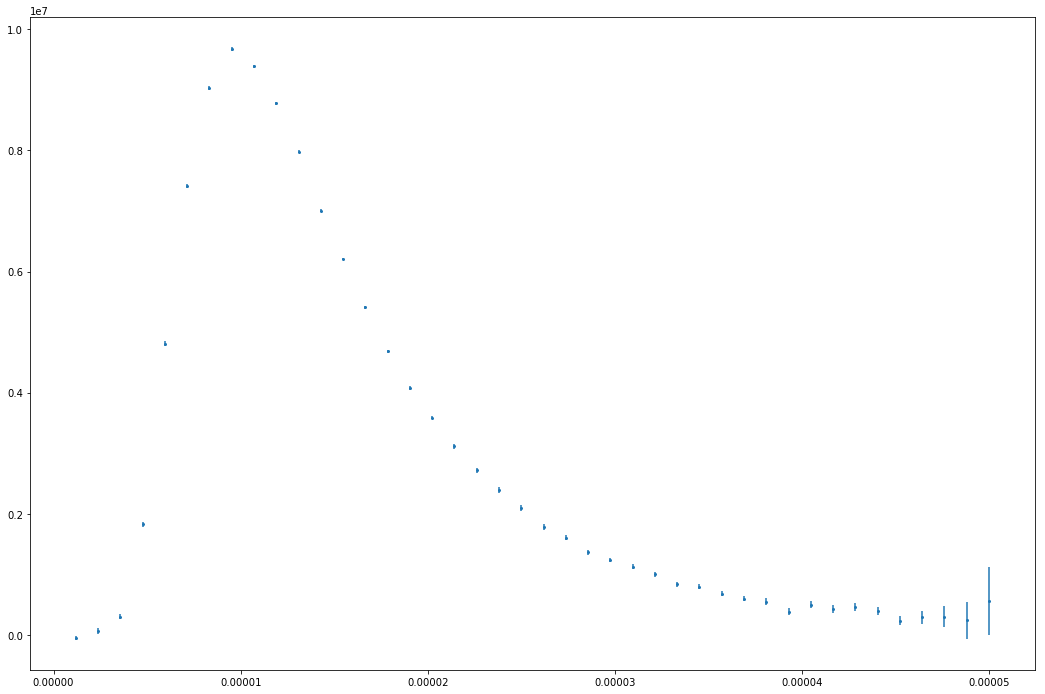

In [19]:
figure(figsize=[18,12])
errorbar(wavelengths,intensities,yerr=intensity_err,linestyle='',marker='o',markersize=2)
show()

Ok now we're good to go. The law that describes this emission is [Planck's law](http://en.wikipedia.org/wiki/Planck%27s_law):

$$I_T(\lambda) =\frac{2 hc^2}{\lambda^5} \frac{1}{e^{h c/(\lambda k_\mathrm{B}T)} - 1}$$

Don't worry too much about the equation, you will learn a little bit about how finding this equation lead to revolutions in our understanding of matter during your introduction to quantum mechanics. For now we'll just take for granted that it tells us how much light is emitted at a particular wavelength and how this varies with temperature. 

Really when we talk about fitting we mean we're varying the parameters an equation depends upon (in this case the temperature) until what the function predicts is as close as possible to the data we have. We might do this because we want to make new predictions or in many cases we are interested in the parameters themselves. We can use the above equation to turn a spectrometer into a thermometer for black-bodies. 

We'll do that here to figure out how hot the object was that emitted the radiation our experiment captured.

Planck's law involves some constants, namely Plank's constant *h*, the speed of light *c* and Boltzmann's constant *k*, so we'll import those from a python module and then use them in our function:

    from scipy.constants import h,c,k

In [20]:
from scipy.constants import h,c,k

Now we need to translate Planck's law into a form the computer understands using our newly learned *function* syntax. For the purposes of fitting, the order in which we write the arguments of our function is important. **The fitting parameters must be the last arguments in our function signature**. In this case we have a function of wavelength, so wavelength comes first, where temperature acts as a parameter that determines how the function behaves so it comes last. 

    def intensity_f(wavelength, temperature):
        "Blackbody radiation intensity"
        return 2*h*c**2/wavelength**5 * 1/(e**(h*c/(wavelength*k*temperature))-1)

In [21]:
def intensity_f(wavelength,temperature):
    "Blackbody radiation intensity"
    return 2*h*c**2/wavelength**5 * 1/(e**(h*c/(wavelength*k*temperature))-1)

Let us make sure our function is working by plotting the variation of intensity with wavelength for two different temperatures: 5800 Kelvin (about the temperature of the sun) and 3600 Kelvin (the temperature of Betelgeuse, a star in the constellation of Orion):

    test_wavelengths = linspace(1e-7,2e-6,200)
    test_intensities_sun = intensity_f(test_wavelengths, 5800)
    test_intensities_betelgeuse = intensity_f(test_wavelengths, 3600)

    plot(test_wavelengths, test_intensities_sun,color="gold",label="T=5800K")
    plot(test_wavelengths, test_intensities_betelgeuse,color="red",label="T=3600K")
    legend()
    show()

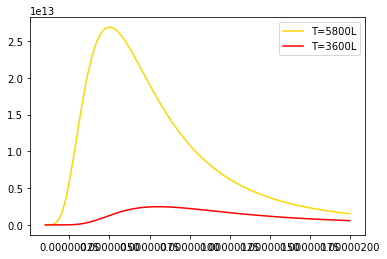

In [22]:
test_wavelengths=linspace(1e-7,2e-6,200)
test_intensities_sun=intensity_f(test_wavelengths,5800)
test_intensities_betelgeuse=intensity_f(test_wavelengths,3600)
plot(test_wavelengths,test_intensities_sun,color="gold",label="T=5800L")
plot(test_wavelengths,test_intensities_betelgeuse,color="red",label="T=3600L")
legend()
show()

(This is actually not such an awful model of the spectral output of the sun, the region of greatest intensity is the visible spectrum spanning 400-700 nm)

Moving on to fit our data points. *curve_fit* works in a similar way to the polyfit function we used before except that it takes as its first argument the function we are trying to fit:

    curve_fit(intensity_f, wavelengths, intensities)

In [23]:
curve_fit(intensity_f,wavelengths,intensities)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 1.]), array([[ inf]]))

It gives us back the coefficients we are interested in and like polyfit gives us a matrix of numbers whose the square root of the diagonal elements give us the uncertainties associated with the coefficients. In this case we only have one coefficient, the temperature, so the covariance matrix is only a single number. In this case though we have a problem: we're getting back a coefficient with the value of one and an uncertainty of infinity! If we use this coefficient and take a look at what intensities our function predicts for the wavelengths in our data set we see:

    intensity_f(wavelengths, 1)

In [24]:
intensity_f(wavelengths,1)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   6.76989531e-285,
         1.14646910e-269,   5.74926237e-256,   1.41239605e-243,
         2.56594509e-232,   4.84409444e-222,   1.26166075e-212,
         5.75200925e-204,   5.61447586e-196,   1.39286618e-188,
         1.01734179e-181,   2.48321693e-175,   2.26069275e-169,
         8.44651133e-164,   1.40817248e-158,   1.12746300e-153,
         4.62575141e-149,   1.03000443e-144,   1.30991013e-140,
         9.95769882e-137,   4.71278492e-133,   1.44034774e-129,
         2.93771188e-126,   4.11897480e-123,   4.07816047e-120])

These values are insanely small - hundred of orders of magnitude too small! What's gone wrong?
In general, a non-linear fit procedure needs an initial guess value for the fitting parameter, which will then be adjusted to best fit the data. In the case above we didn't specify a guess for what our initial parameter should be and that meant curve_fit used it's default guess value, which happens to be 1. That turned out to be a bad guess, and the algorithm was not able to converge to a sensible value.

The down side of doing a non linear fit is that we need to start off with vaguely sensible parameter values otherwise our fitting process can go badly (or not so badly) wrong. Usually you want to try and use some kind of physical knowledge to guide your guess, though sometimes you have to just use trial and error. In our case the default guess means our starting point is a prediction for 1 degree Kelvin which is too low a temperature. We will use the *p0* keyword to specify a guess of 150 Kelvin (which is still a low temperature from the perspective of synthetic chemistry but is not verging on absolute zero)

    curve_fit(intensity_f, wavelengths, intensities, p0=[150])

In [25]:
curve_fit(intensity_f,wavelengths,intensities,p0=[150])

(array([ 297.96013661]), array([[ 0.02579146]]))

Ah much better now, we have a predicted coefficient of ~298 Kelvin i.e. room temperature and the curve_fit is reporting an uncertainty of just 0.16. However, we have implicitly assumed that all data points have the same uncertainty, which is not the case. Just as polyfit can take into account different uncertainties in our data so that more weight is associated with data points that are more certain, curve_fit can do the same.

    curve_fit(intensity_f, wavelengths, intensities, p0=[150], sigma=intensity_err)

In [26]:
curve_fit(intensity_f,wavelengths,intensities,p0=[150],sigma=intensity_err)

(array([ 297.96004273]), array([[ 0.00526123]]))

When we used polyfit we passed in the weights associated with each points, where the weight was 1/&sigma;<sup>2</sup>, curve_fit is doing exactly the same thing but we give it the sigma values and it works out the weighting for us. Thus we pass the sigma values directly to the function. 

Doing so means our uncertainty drops to just 0.073.

    curve_out = curve_fit(intensity_f, wavelengths, intensities, p0=[150], sigma=intensity_err)
    curve_params = curve_out[0]
    curve_cov = curve_out[1]
    curve_cov **0.5

In [27]:
curve_out=curve_fit(intensity_f,wavelengths,intensities,p0=[150],sigma=intensity_err)
curve_params=curve_out[0]
curve_cov=curve_out[1]
curve_cov**0.5

array([[ 0.07253436]])

Let's use our fitted function to generate the fitted spectrum and plot out predicted_intensities alongside our original data

    predicted_temp = curve_params[0]
    test_wavelengths = linspace(1e-7,5e-5,100)
    predicted_intensities = intensity_f(test_wavelengths, predicted_temp)
   
    figure(figsize=[18,12])
    errorbar(wavelengths, intensities, yerr=intensity_err, linestyle='',marker='o', markersize=2 )
    plot(test_wavelengths, predicted_intensities, linestyle='--')
    show()

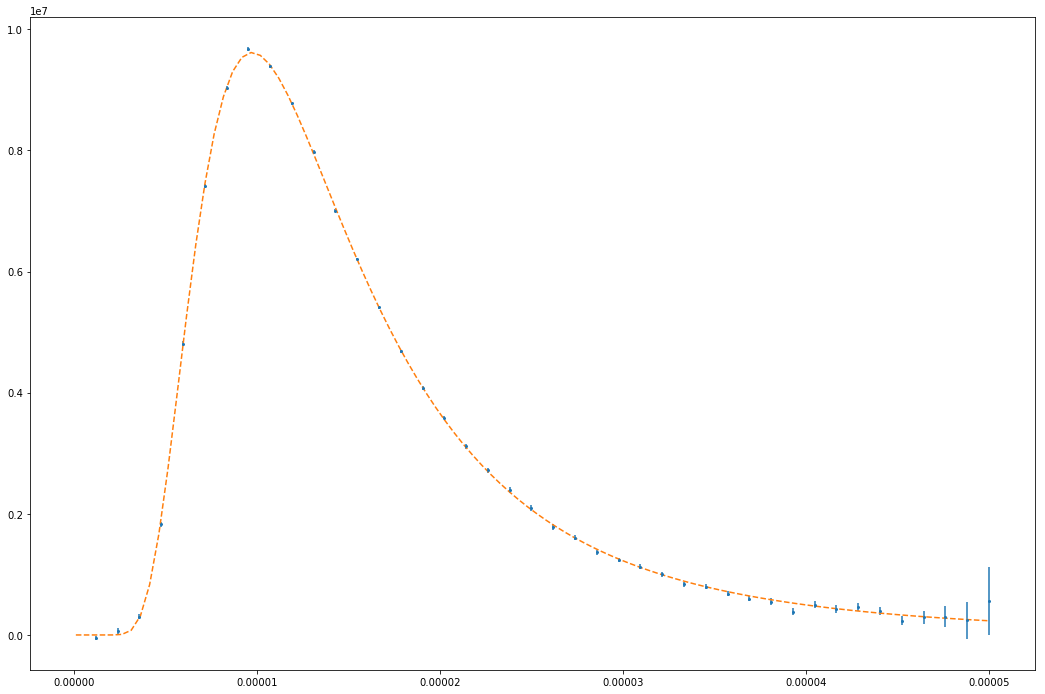

In [28]:
predicted_temp=curve_params[0]
test_wavelengths=linspace(1e-7,5e-5,100)
predicted_intensities=intensity_f(test_wavelengths,predicted_temp)
figure(figsize=[18,12])
errorbar(wavelengths,intensities,yerr=intensity_err,linestyle='',marker='o',markersize=2)
plot(test_wavelengths,predicted_intensities,linestyle='--')
show()

For completeness we'll add the units these things are measured in as labels, and scale the units so that our figure has nicer values along the axes.

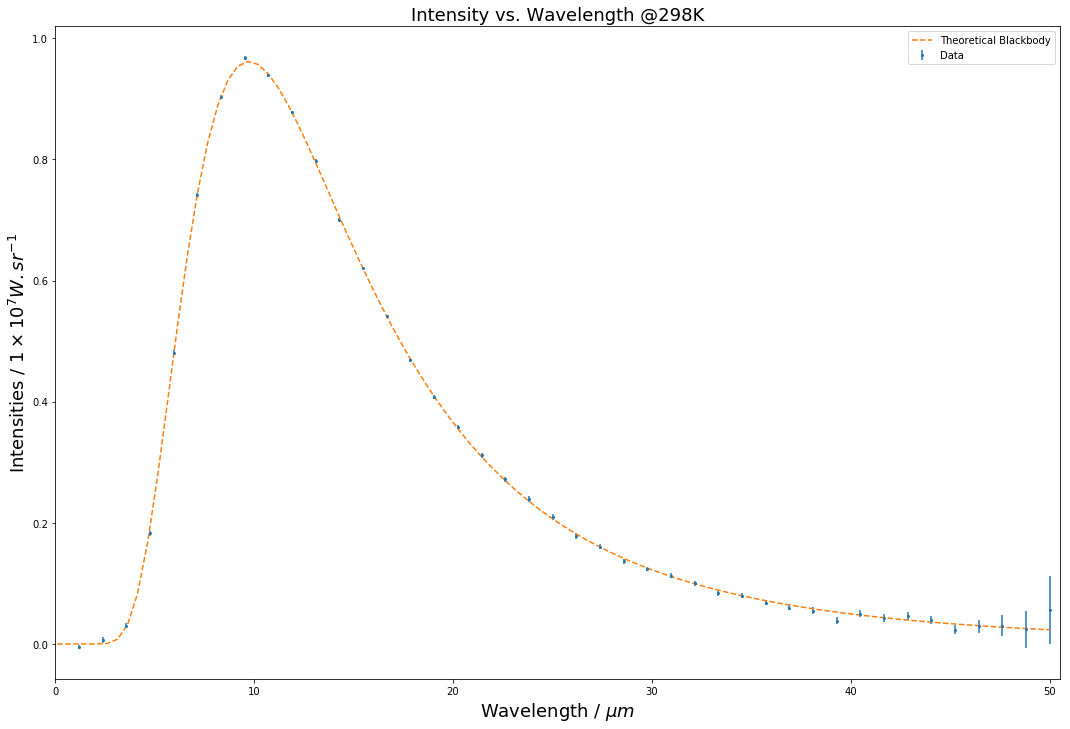

In [29]:
wavelengths_new_units = wavelengths/1e-6
intensities_new_units = intensities/1e7
intensity_err_new_units = intensity_err/1e7

figure(figsize=[18,12])
errorbar(wavelengths_new_units, intensities_new_units, yerr=intensity_err_new_units, linestyle='',marker='o', markersize=2, label='Data')
plot(test_wavelengths/1e-6, predicted_intensities/1e7, linestyle='--', label='Theoretical Blackbody')
title('Intensity vs. Wavelength @298K', fontsize=18)
xlabel('Wavelength / $\mu m$', fontsize=18)
ylabel(r'Intensities / $1 \times 10^7 W.sr^{-1}$', fontsize=18)
xlim(0,50.5)
legend()
show()

As we expected from the very low uncertainty associated with our predicted temperature the fit is excellent. We conclude that the body emitting the spectrum our data set captured was at ~298 Kelvin - room temperature.

## 3D Plotting

In addition to creating two dimensional plots we can make use of matplotlib's functionality to make three dimensional plots though there is a bit of extra overhead to do so.

We'll need to use the Axes3D object so lets import that now

    from mpl_toolkits.mplot3d.axes3d import Axes3D

In [30]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

This type of 3D plots is particularly useful to study functions of more than one variable. For example a function that takes an x and y coordinate and returns the sine of the distance between the point they define and the origin:

$$f(x,y)=\sin\left(\sqrt{x^2+y^2}\right)$$

We will write this as a python function as

    def z_f(x, y):
        "Sine of the distance to the origin."
        r = (x**2 + y**2)**0.5
        return sin(r)

In [31]:
def z_f(x,y):
    "sine of the distance to the origin."
    r=(x**2+y**2)**0.5
    return sin(r)

To plot three dimensional data most of the time we need the data to be in to the form of grids. 

The way we do this is to specify the region of x and y that we are interested in (using arrays as before), then use the **meshgrid** function to transform this into the grid form that we need. Here we choose both our x and our y values to run from -4 to 4 in 100 steps.

    x_data = linspace(-4,4,100)
    y_data = linspace(-4,4,100)

    mesh_data = meshgrid(x_data, y_data)

    X_data = mesh_data[0]
    Y_data = mesh_data[1]

In [32]:
x_data=linspace(-4,4,100)
y_data=linspace(-4,4,100)
mesh_data=meshgrid(x_data,y_data)
X_data=mesh_data[0]
Y_data=mesh_data[1]

Once we have our transformed variables we can use our function to generate the Z_values (i.e. our function values)

    Z_data = z_f(X_data, Y_data)

In [33]:
Z_data=z_f(X_data,Y_data)

We are now in a position to plot the data. The plotting commands are similar to those we used before, though we have to assign more variables than we did when creating two dimensional figures.

    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    ax.plot_wireframe(X_data, Y_data, Z_data)
    show()

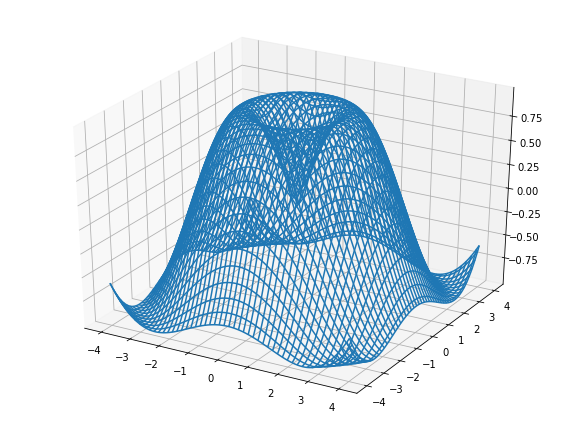

In [34]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
ax.plot_wireframe(X_data,Y_data,Z_data)
show()

We can control how fine our wireframe mesh is using the *rstride* and *cstride* keywords, these define how many of the wires that make up the mesh to skip out, so a higher a number makes for a sparser plot.

    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    ax.plot_wireframe(X_data, Y_data, Z_data, rstride=3, cstride=3)
    show()

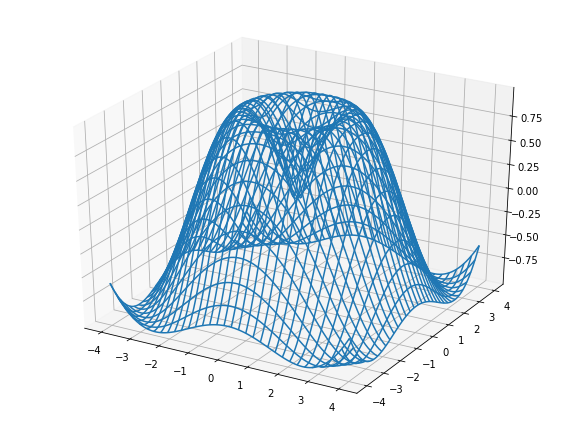

In [35]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
ax.plot_wireframe(X_data,Y_data,Z_data,rstride=3,cstride=3)
show()

We can also create a surface plot where the holes are filled in by using the *plot_surface* function

    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    ax.plot_surface(X_data, Y_data, Z_data, rstride=3, cstride=3)
    show()

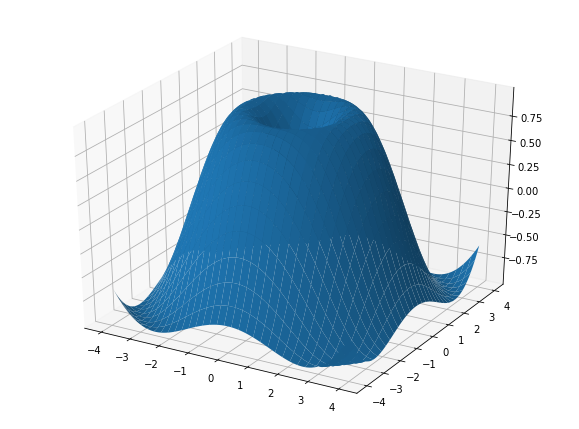

In [36]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
ax.plot_surface(X_data,Y_data,Z_data,rstride=3,cstride=3)
show()

We can use the z-value to colour the plot using the *cmap* keyword (there are multiple ways to assign colors to z values many such *colormaps* are defined inside pylab's [cm](http://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html) object):

    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    ax.plot_surface(X_data, Y_data, Z_data, rstride=3, cstride=3, cmap=cm.hot)
    show()

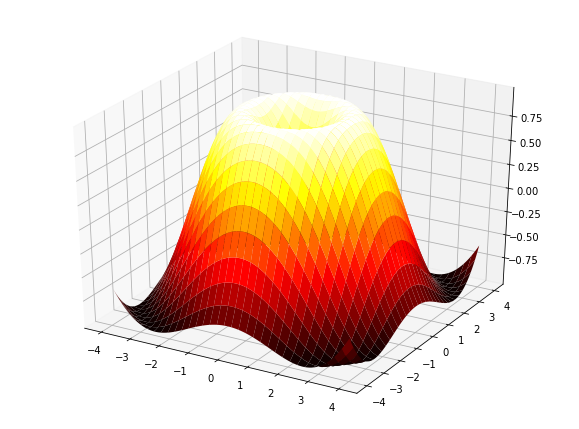

In [37]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
ax.plot_surface(X_data,Y_data,Z_data,rstride=3,cstride=3, cmap=cm.hot)
show()

If we capture the plot to a variable we can add a colour bar (we'll use a different colormap this time)

    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    p=ax.plot_surface(X_data, Y_data, Z_data, rstride=3, cstride=3, cmap=cm.coolwarm)
    colorbar(p, shrink=0.5)
    show()

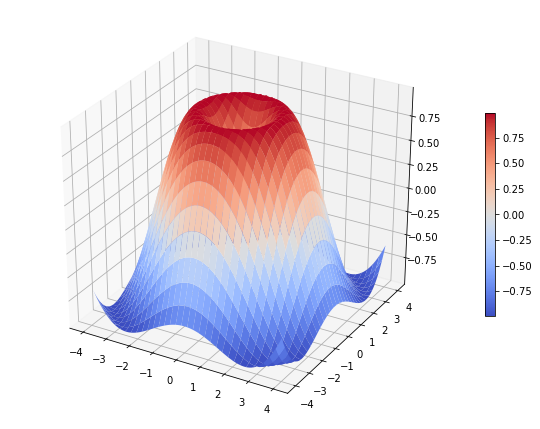

In [38]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
p=ax.plot_surface(X_data,Y_data,Z_data,rstride=3,cstride=3,cmap=cm.coolwarm)
colorbar(p,shrink=0.5)
show()

Notice we set the shrink keyword see why by creating the same figure as above below except omitting this keyword

We can control the width of the lines defining the mesh using the *linewidth* keyword

    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    p=ax.plot_surface(X_data, Y_data, Z_data, rstride=2, cstride=2, linewidth=.25, cmap=cm.coolwarm)
    colorbar(p, shrink=0.5)
    show()

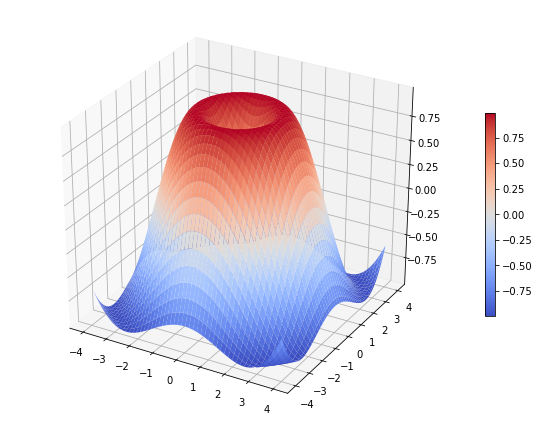

In [39]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
p=ax.plot_surface(X_data,Y_data,Z_data,rstride=2,cstride=2,cmap=cm.coolwarm,linewidth=0.25)
colorbar(p,shrink=0.5)
show()

The perspective of our plot can be controlled the *view_init* function. The first argument corresponds to and angle in degrees measured from the *xy* plane to the position of the "viewer" (elevation with respect to the base plane), while the second argument controls the angle in degrees with respect to the *xz* plane. Try a couple of values yourself.

    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    p=ax.plot_surface(X_data, Y_data, Z_data, rstride=2, cstride=2, linewidth=.25, cmap=cm.coolwarm)
    colorbar(p, shrink=0.5)
    ax.view_init(60,20)
    show()

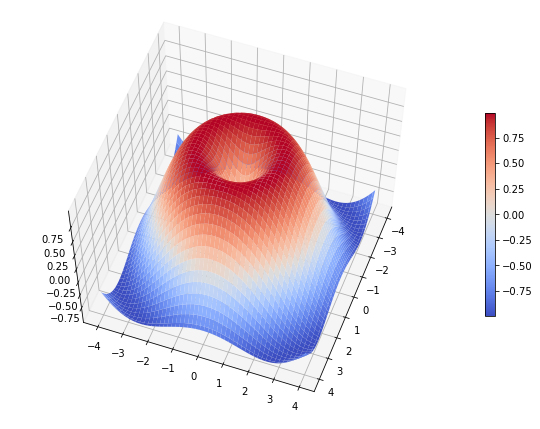

In [40]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
p=ax.plot_surface(X_data,Y_data,Z_data,rstride=2,cstride=2,cmap=cm.coolwarm,linewidth=0.25)
colorbar(p,shrink=0.5)
ax.view_init(60,20)
show()

### Projections

While the surfaces we have been generating are very neat, often less information is better, and some projection of the surface on to a plane is more clear. Two types of plots do this well, a top down view and a contour plot.

We can produce a top down view of the data using the *pcolor* function:

    figure(figsize=(8,6))
    ax = gca()
    p = ax.pcolor(X_data, Y_data, Z_data, cmap=cm.coolwarm)
    colorbar(p, ax=ax)
    show()

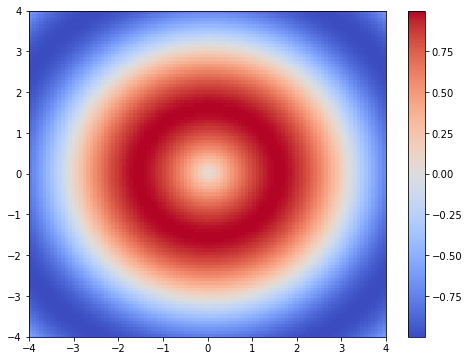

In [41]:
figure(figsize=(8,6))
ax=gca()
p=ax.pcolor(X_data,Y_data,Z_data,cmap=cm.coolwarm)
colorbar(p,ax=ax)
show()

A countour plot is simpler

    figure(figsize=(6,6))
    contour(X_data,Y_data,Z_data)
    show()

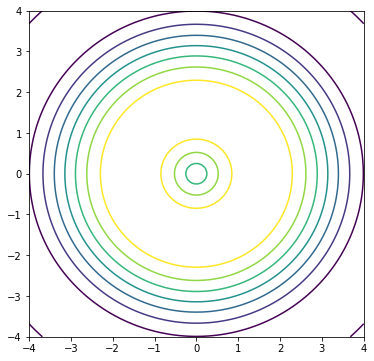

In [42]:
figure(figsize=(6,6))
contour(X_data,Y_data,Z_data)
show()

We can combine both contour plots and surfaces in the same plot:

    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    ax.plot_surface(X_data, Y_data, Z_data, rstride=2, cstride=2, alpha=0.25, cmap=cm.hot)
    ax.contour(X_data, Y_data, Z_data, zdir='z', offset=-2, cmap=cm.hot)
    ax.set_zlim(-2,2)
    show()

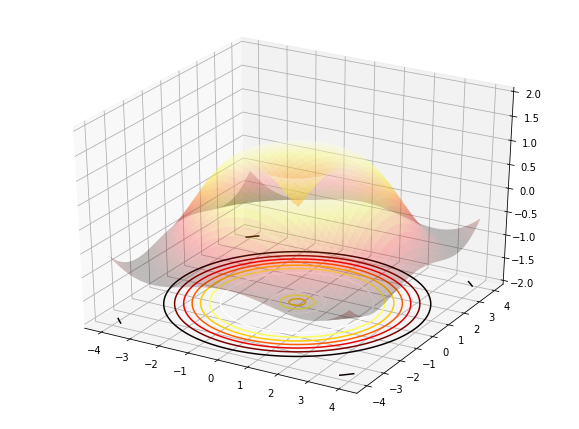

In [43]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
ax.plot_surface(X_data,Y_data,Z_data,rstride=2,cstride=2,alpha=0.25,cmap=cm.hot)
ax.contour(X_data,Y_data,Z_data,zdir='z',offset=-2,cmap=cm.hot)
ax.set_zlim(-2,2)
show()

Or with a filled contour plot:
    
    figure(figsize=(10,7.5))
    ax = gca(projection='3d')
    p=ax.plot_surface(X_data, Y_data, Z_data, rstride=2, cstride=2, alpha=0.25, cmap=cm.hot)
    ax.contourf(X_data, Y_data, Z_data, zdir='z', offset=-2, cmap=cm.hot)
    ax.set_zlim(-2,2)
    colorbar(p, ax=ax, shrink=0.5)
    show()

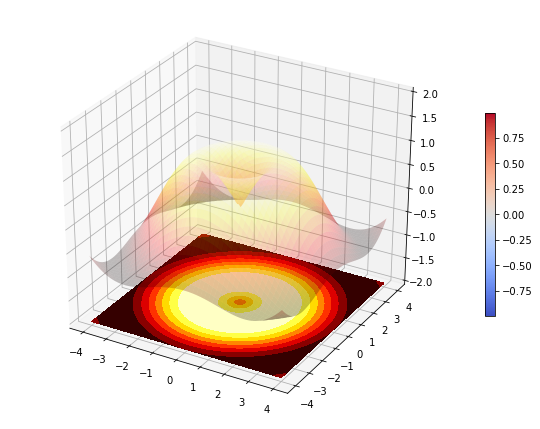

In [44]:
figure(figsize=(10,7.5))
ax=gca(projection='3d')
ax.plot_surface(X_data,Y_data,Z_data,rstride=2,cstride=2,alpha=0.25,cmap=cm.hot)
ax.contourf(X_data,Y_data,Z_data,zdir='z',offset=-2,cmap=cm.hot)
ax.set_zlim(-2,2)
colorbar(p,ax=ax,shrink=0.5)
show()

## Bonus Material!

The core content of the these workshops ends here. Below we will look at a couple of more advanced features, that can be very useful and are kind of fun too.

### Interact

Armed with our ability to build functions we can do something a bit snazzy with our plotting. We can make them interactive! Suppose we have a simple *y=x<sup>2</sup> +c<sub>0</sub>x* function that we want plot, let's plot 50 points it for x between 0 and 10, with *c<sub>0</sub>* set to 1: 

    c0 = 1
    x = linspace(0,10,50)
    y = x**2  + c0*x
    plot(x,y, linestyle='', marker='o')
    show()

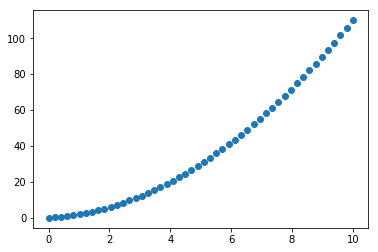

In [45]:
c0=1
x=linspace(0,10,50)
y=x**2+c0*x
plot(x,y,linestyle='',marker='o')
show()

Now let's suppose we want to see how the function changes as the coefficient in front of x changes. 

We could make several different plots picking different values for this coefficient at looking at them. That's a reasonable thing to do but we could also make the figure dynamically change as we vary our coefficients.

    from ipywidgets import interact

    @interact(c1=(-10,10,0.01))
    def interact_poly(c1):
        x = linspace(0, 10, 50)
        y = x**2 + c1*x
        plot(x, y, linestyle='', marker='o')
        ylim(-50,200)
        show()

In [46]:
from ipywidgets import interact

@interact(c1=(-10,10,0.01))
def interact_poly(c1):
    x=linspace(0,10,50)
    y=x**2+c1*x
    plot(x,y,linestyle='',marker='o')
    ylim(-50,200)
    show()

What we've done is to bundle all the plotting commands inside a function that we've called "interact_poly". The coefficient we're interested in examining interactively (c0) has been made an argument of this function.

We then use the special function 'interact' (which we've had to import). The way this special function works and an explanation of the '@' syntax it uses are beyond the scope of this course but we can use it as we do in the above code cell. We place an '@interact' on the line above the "interact_poly" function signature. Inside the @interact function we put the parameter we want to vary which is c0 in our case and we tell interact we want to look at c0 between -10 and 10 in steps that are 0.01 large. The machinery does the rest for us giving us a slider bar that sets the value of c0. 

We can also do this with more than one coefficient

    @interact(c1=(-10,10,0.01), c2=(-5,5,1))
    def interact_poly(c1,c2):
        x = linspace(0, 10, 50)
        y = c2*x**2 + c1*x 
        plot(x, y, linestyle='', marker='o')
        ylim(-500,500)
        show()

In [47]:
from ipywidgets import interact

@interact(c1=(-10,10,0.01),c2=(-5,5,1))
def interact_poly(c1,c2):
    x=linspace(0,10,50)
    y=c2*x**2+c1*x
    plot(x,y,linestyle='',marker='o')
    ylim(-50,200)
    show()

In fact this machinery is extremely flexible.

We will visualise a modified form of the same function we plotted above where an extra term has been added.

    def mod_z_f(x, y, shift):
        r = (x**2 + y**2)**0.5
        return sin(r+shift)

In [48]:
def mod_z_f(x,y,shift):
    r=(x**2+y**2)**0.5
    return sin(r+shift)

As before we define range of x values and y values we want to visualize and convert the arrays to grid form for the 3d plot.

    anim_x_data = linspace(-8,8,40)
    anim_y_data = linspace(-8,8,40)

    anim_mesh_data = meshgrid(anim_x_data, anim_y_data)

    anim_X_data = anim_mesh_data[0]
    anim_Y_data = anim_mesh_data[1]

In [49]:
anim_x_data = linspace(-8,8,40)
anim_y_data = linspace(-8,8,40)

anim_mesh_data = meshgrid(anim_x_data, anim_y_data)

anim_X_data = anim_mesh_data[0]
anim_Y_data = anim_mesh_data[1]

Now we will use interact to plot the function allowing us to dynamically specify the value for our additional *shift* parameter

    @interact(shift=(-4*pi,4*pi,pi/6))
    def flying_volcanoe(shift):
        anim_Z_data = mod_z_f(anim_X_data, anim_Y_data,shift)
        ax = gca(projection='3d')
        ax.plot_surface(anim_X_data, anim_Y_data, anim_Z_data, cstride=2, rstride=1, linewidth=.25, cmap=cm.Reds)
        show()

In [50]:
@interact(shift=(-4*pi,4*pi,pi/36))
def flying_volcanoe(shift):
    anim_Z_data = mod_z_f(anim_X_data, anim_Y_data,shift)
    ax = gca(projection='3d')
    ax.plot_surface(anim_X_data, anim_Y_data, anim_Z_data, cstride=2, rstride=1, linewidth=.25, cmap=cm.Reds)
    show()

Feel free to experiment!

## Summary

In this workshop we moved from fitting simple linear relation to more complex non-linear fits. Although non-linear fits are more flexible, they are in general less robust then linear fits, and they need an adequate choice of initial parameter guess.

We also explorer several ways in which complex data can be visualized.

## Exercises

### Exercise 1

We've learned how to use *curve_fit* to fit **any** function to a set of data. When fitting straight lines, *polyfit* is more suitable as it doesn't require us to specify a guess and is more robust. However, that doesn't mean we couldn't use *curve_fit* to do the same thing.

The file [linear_data.txt](linear_data.txt) contains some data we want to fit a straight line to, similar to the example we used to illustrate polyfit in workshop 3 (under the "Fitting" heading). 

* Load the data and produce a plot of the points.

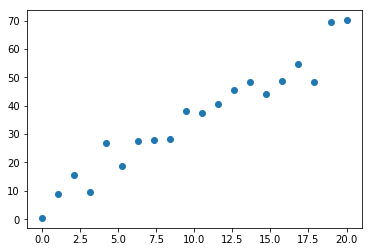

In [51]:
ld=loadtxt('linear_data.txt')
x=ld[:,0]
y=ld[:,1]
plot(x,y,linestyle='',marker='o')
show()

* Using the syntax we learned above define a function called *line*, that will return the values of y according to the mathematical expression: $y = m x +c$. The function will need to take as arguments the value of x, along with two parameters: the gradient and the intercept of the line.

In [52]:
def line(x,m,c):
    "1st degree polynomial"
    return m*x+c

* Use *curve_fit* and your function *line* to determine the parameters the best fitting straight line.

In [53]:
curve=curve_fit(line,x,y)
curve_params=curve[0]
m=curve_params[0]
c=curve_params[1]

* Use the gradient and intercept you obtain to add a straight line of best fit to your plot of the data points.

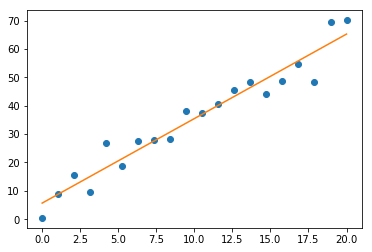

In [54]:
plot(x,y,linestyle='',marker='o')
y1=line(x,m,c)
plot(x,y1,linestyle='-')
show()

### Exercise 2

In the same directory as this notebook is a file called leps.py. It defines a function of two variables called "get_energy", which gives the potential energy surface of a simple chemical reaction. Import this function and use it to compute the energy for x=1 and y=1 

In [55]:
import leps
leps.get_energy(1,1)

-3.3303404561837286

Create a figure with the surface defined by this function. Define your grid using x and y values that range from 0.35 to 4. Use ax.set_zlim() to set z-axis viewing window, ax.view_init to set the camera angle, as well as setting the rstride, cstride, and cmap keywords, as well as the keyword edgecolor not covered before, such that you get the following figure: 
    
![If you don't seen an image you may not be running the notebook on the same folder as the image files.](leps.png "LEPS potential. Target perspective.")

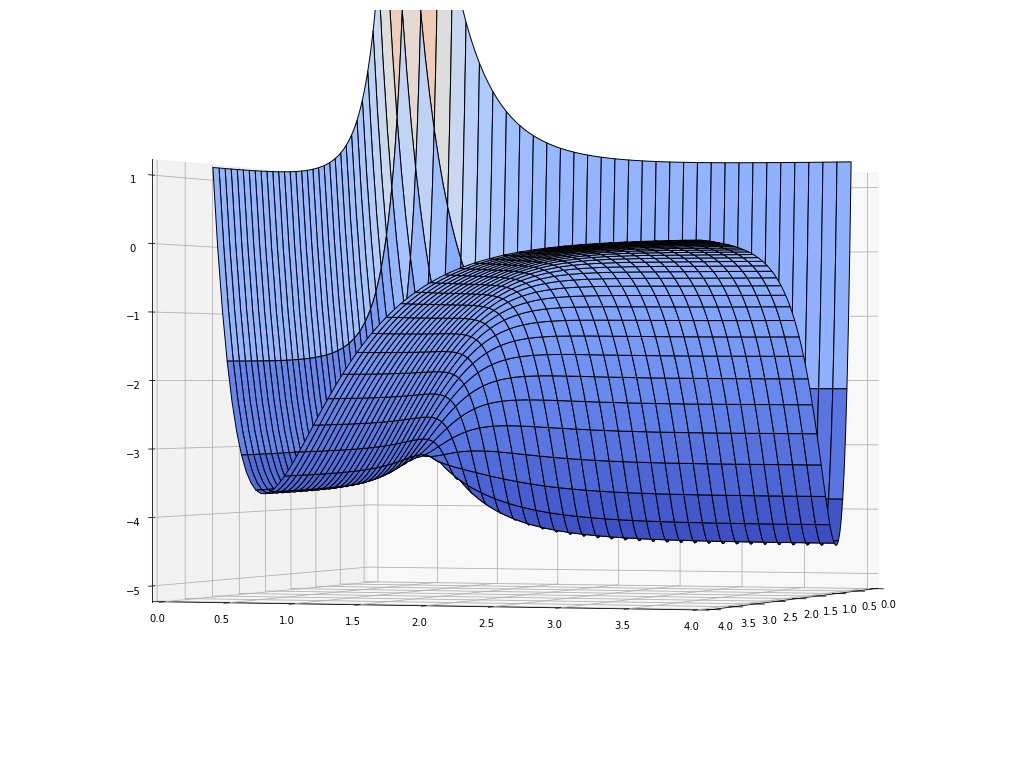

In [56]:
x1=linspace(0.35,4,100)
y1=linspace(0.35,4,100)
mesh_data=meshgrid(x1,y1)
x2=mesh_data[0]
y2=mesh_data[1]
z1=leps.get_energy(x2,y2)
figure(figsize=(18,14))
ax=gca(projection='3d')
ax.plot_surface(x2,y2,z1,rstride=3,cstride=3,cmap=cm.coolwarm,linewidth=1,edgecolor='black')
ax.set_zlim(-5.1,1.1)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.view_init(0,20)
show()

Bonus: use interact to create an interactive 3D plot where slider bars are used to control the camera angles

In [57]:
from ipywidgets import interact

@interact(c1=(-20,20,0.01),c2=(-20,20,0.01))
def interact_camera(c1,c2):
    x1=linspace(0.35,4,100)
    y1=linspace(0.35,4,100)
    mesh_data=meshgrid(x1,y1)
    x2=mesh_data[0]
    y2=mesh_data[1]
    z1=leps.get_energy(x2,y2)
    figure(figsize=(18,14))
    ax=gca(projection='3d')
    ax.plot_surface(x2,y2,z1,rstride=3,cstride=3,cmap=cm.coolwarm,linewidth=1,edgecolor='black')
    ax.set_zlim(-5.1,1.1)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.view_init(c1,c2)
    show()

## Resources

* http://www.matpmlotlib.org - The project web page for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended!
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.